# Extended Report of Data Completeness

New method for measuring degree of data completeness was implemented. For each timestamp the ratio of data completeness was calculated across all parameters. This ratio was calculated as number of coins with filled values for given timestamp and parameter divided by number of coins that potentially can be filled with values. 

Two main factors were taken into account:

1. Number of coins existed by the moment of "timestamp". 
2. Applicability of parameter to coin. Matrix of applicability was created and filled before calculating completeness ratios. This is boolean matrix with dimensions len(params) x len(coins). For any pair of coin and param value of this matrix is True if there is at least one non missing value for time series of this coin & parameter.

In [1]:
# Import of necessary libs and our classes
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from cj_loader import Storer, Extractor

In [2]:
%%time
st = Storer()

Wall time: 1.82 s


In [3]:
%%time
data_compl = st.data_completeness()

Wall time: 3min 26s


Here is the full table of parameters applicabilities:

In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 30):
    display(st.applicability())

,active_address,close,high,low,mcap,mining_difficulty,mining_fees,nva,nvt,nvv,open,txcount,txvolume,volatility,volume,rate_btc,mcap_ratio,trad_to_trans_vol,trans_per_address,tx_per_address,mdiff_to_volatility,volatility_to_mdiff
aelf,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False
monaco,False,True,True,True,True,False,False,False,False,True,True,False,False,True,True,True,True,False,False,False,False,False
tron,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False
rchain,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False
binance-coin,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False
siacoin,False,True,True,True,True,False,False,False,False,True,True,False,False,True,True,True,True,False,False,False,False,False
monetaryunit,False,True,True,True,True,False,False,False,False,True,True,False,False,True,True,True,True,False,False,False,False,False
monero,True,True,True,True,True,True,True,True,False,True,True,True,False,True,True,True,True,False,False,True,True,True
gas,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
gifto,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


It's obviously that open, high, close, low, rate_btc and volume values have the same structure of data precense. The only exclusion is obscence of volume data before 2013-12-27. This can be illustrated by placing their graphs to one layout:

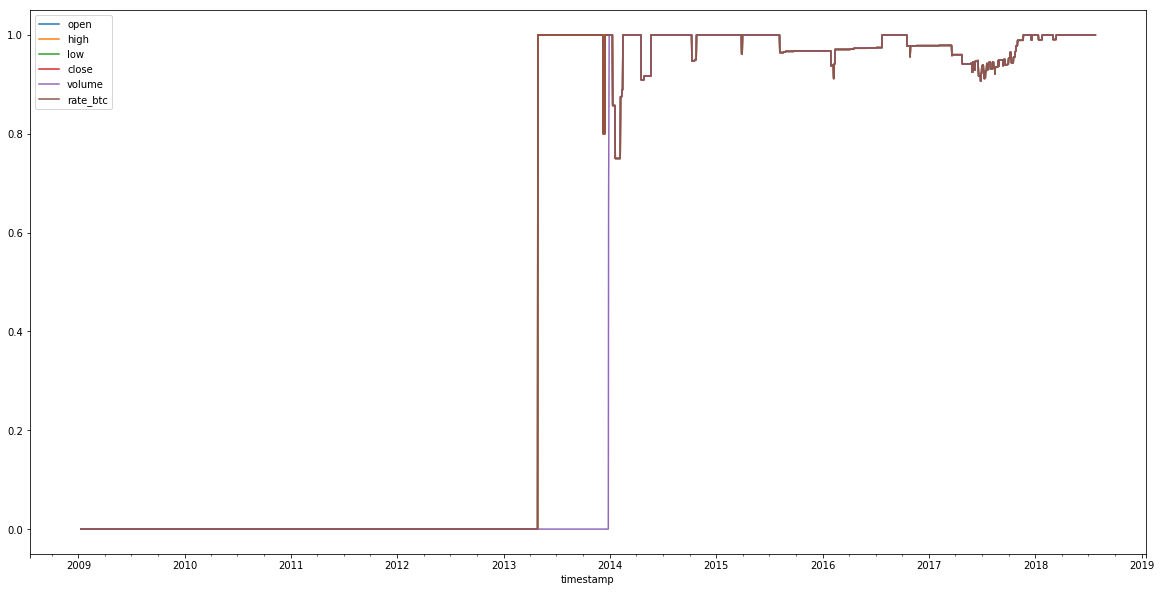

In [5]:
plt.rcParams["figure.figsize"] = (20,10)
data_compl[['open', 'high', 'low', 'close', 'volume', 'rate_btc']].plot()

Below are graphs for other parameters of research. They was grouped by degree of similarity. Some additional parameters were constructed with basic ones. This leads to high mutual dependency in data completeness in these cases.

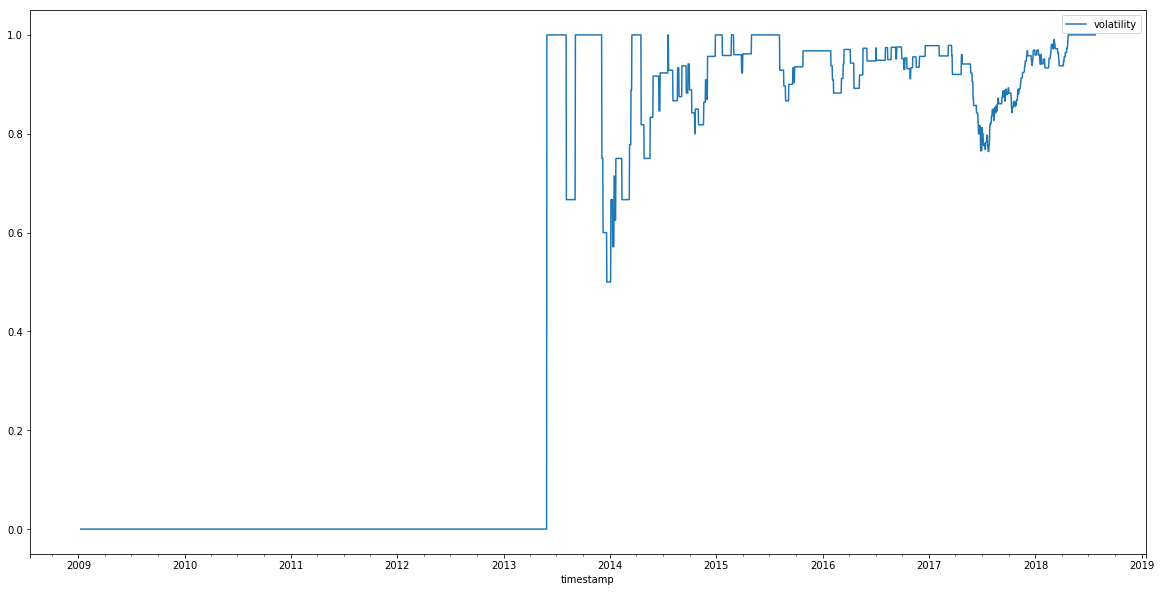

In [6]:
plt.rcParams["figure.figsize"] = (20,10)
data_compl[['volatility']].plot()

(0, 1.1)

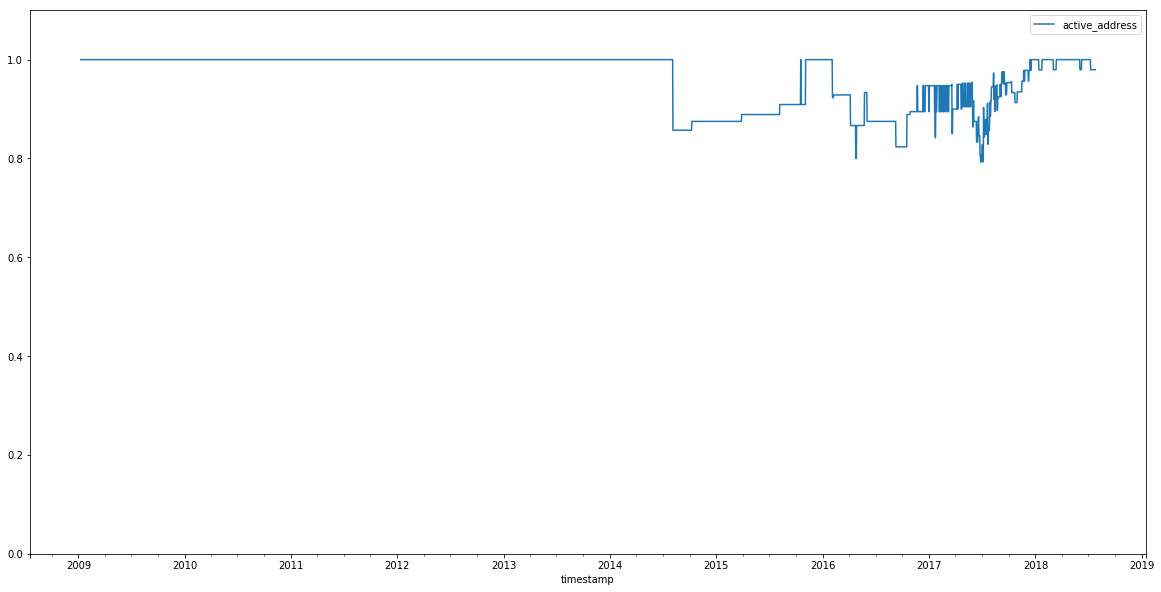

In [10]:
plt.rcParams["figure.figsize"] = (20,10)
data_compl[['active_address']].plot()
axes = plt.gca()
axes.set_ylim([0,1.1])

(0, 1.1)

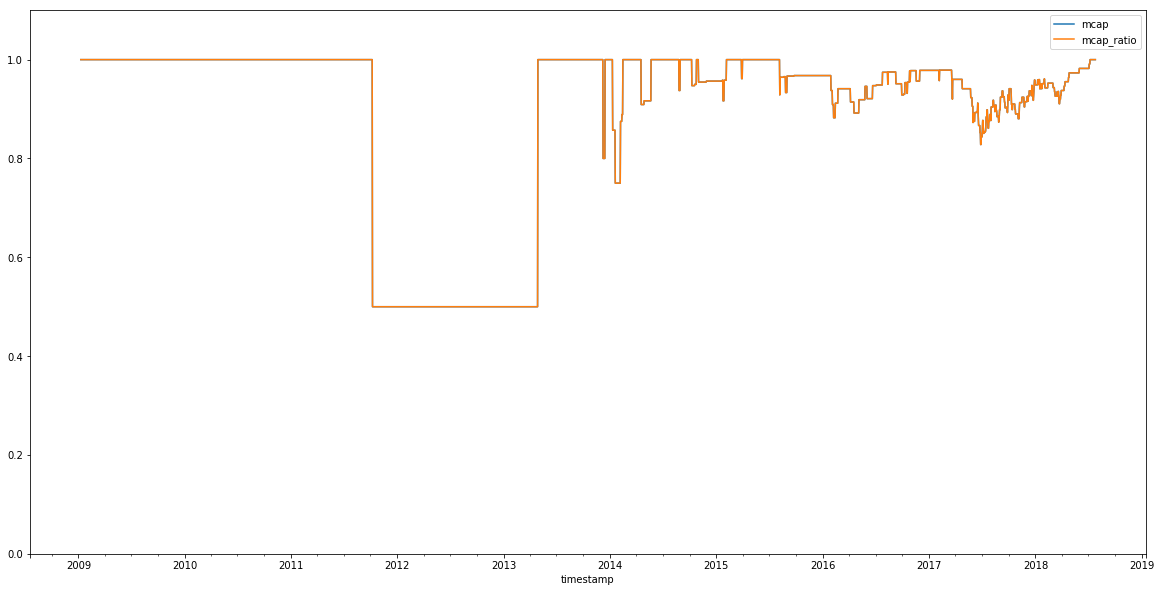

In [11]:
plt.rcParams["figure.figsize"] = (20,10)
data_compl[['mcap', 'mcap_ratio']].plot()
axes = plt.gca()
axes.set_ylim([0,1.1])

(0, 1.1)

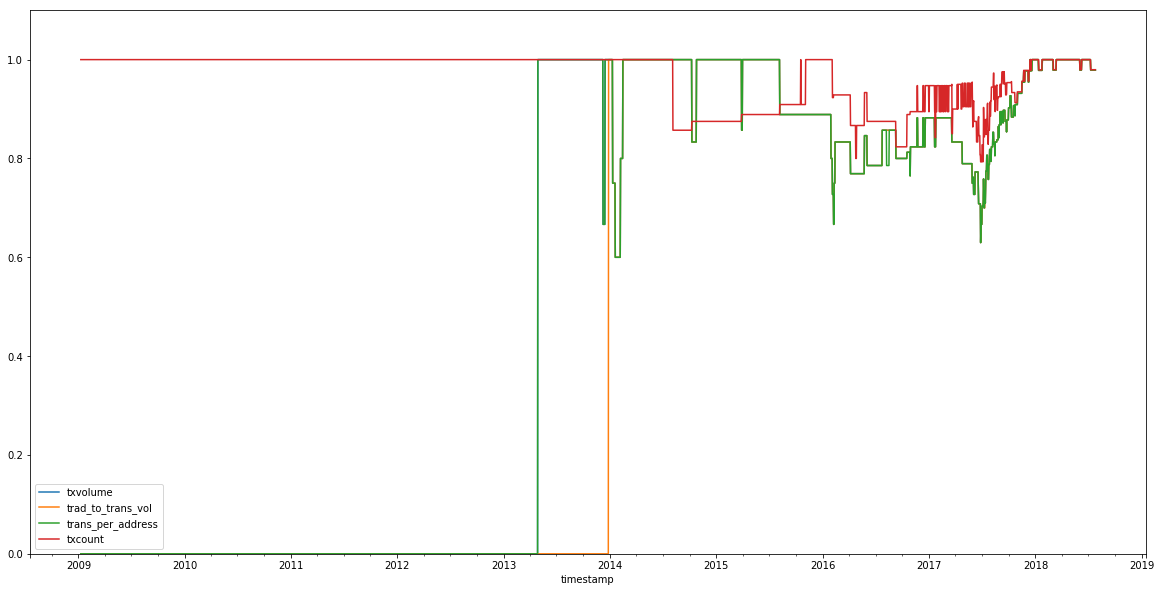

In [12]:
plt.rcParams["figure.figsize"] = (20,10)
data_compl[['txvolume', 'trad_to_trans_vol', 'trans_per_address', 'txcount']].plot()
axes = plt.gca()
axes.set_ylim([0,1.1])

(0, 1.1)

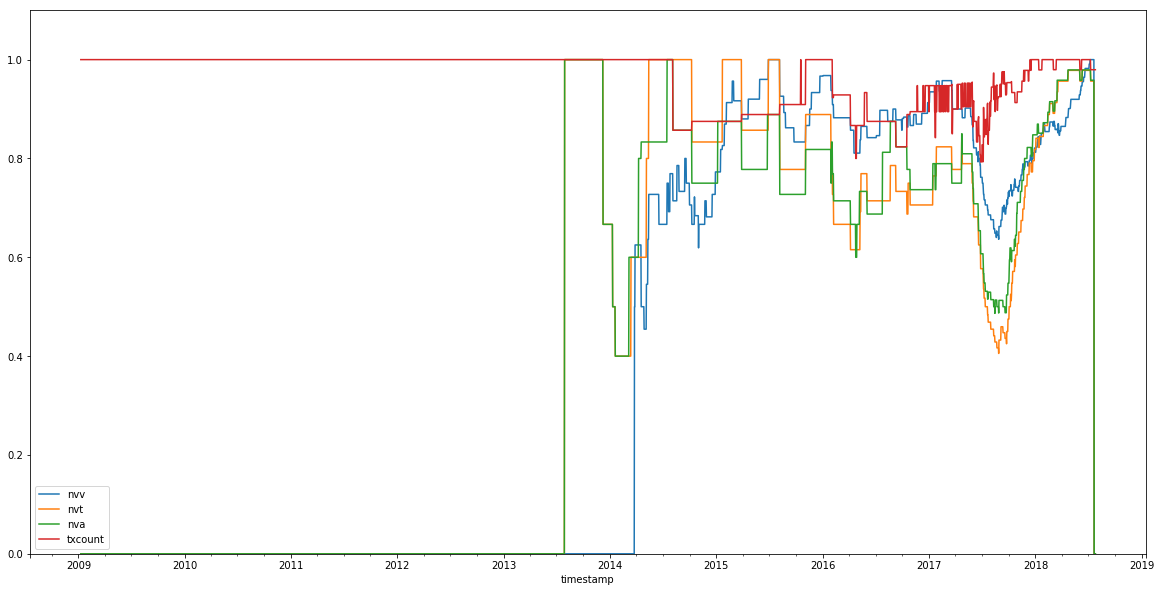

In [14]:
plt.rcParams["figure.figsize"] = (20,10)
data_compl[['nvv', 'nvt', 'nva', 'txcount']].plot()
axes = plt.gca()
axes.set_ylim([0,1.1])

(0, 1.1)

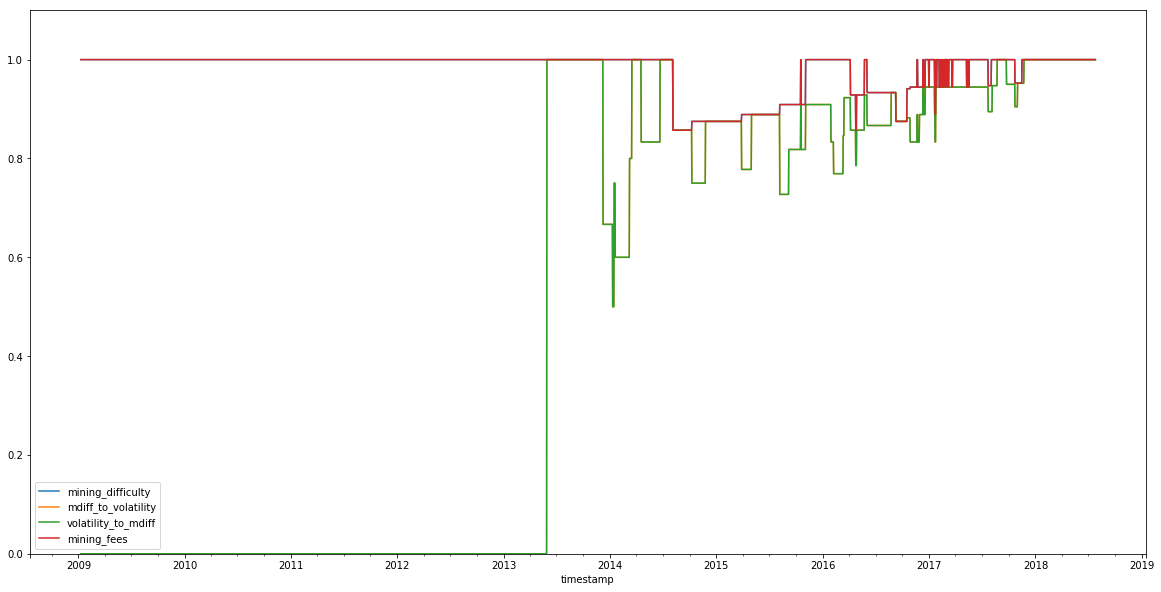

In [15]:
plt.rcParams["figure.figsize"] = (20,10)
data_compl[['mining_difficulty', 'mdiff_to_volatility', 'volatility_to_mdiff', 'mining_fees']].plot()
axes = plt.gca()
axes.set_ylim([0,1.1])

# Conclusions

Situation with missing data is not critical and majority of our parameters are highly presented with valid values.

Cut the data before Q1 of 2014 seems like a good point.

Worst data presence was demonstrated across:
- nvt
- nva
- nvv
- mining_difficulty
- mdiff_to_volatility
- volatility_to_mdiff 

Possibly it will be wise to analyse these parameters more accurately and use presence itself (or some metrics that will use presence) as additional clustering criteria.